In [1]:
# setting the environment
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import re

import statsmodels.api as sm
from scipy.stats import kurtosis, skew
from sklearn.preprocessing import StandardScaler, LabelEncoder

pd.set_option('display.max_columns', 500)

In [84]:
df = pd.read_csv('data/heart_failure_dataset.csv')

# column names are strangely formated, let's fix them quick
replace_dict = {}

for c in df.columns:
    if c not in replace_dict.keys():
        replace_dict[c] = c.replace(' ', '').replace('.', '')     
                                    
df = df.rename(columns=replace_dict)

# our dependent variable (y)
df['Mortality'] = df['Mortality'].astype('category')

df.head(5)

,Age,AgeGroup,Gender,Locality,Maritalstatus,LifeStyle,Sleep,Category,Depression,Hyperlipi,Smoking,FamilyHistory,FHistory,Diabetes,HTN,Allergies,BP,Thrombolysis,BGR,BUrea,SCr,SSodium,SPotassium,SChloride,CPK,CKMB,ESR,WBC,RBC,Hemoglobin,PCV,MCV,MCH,MCHC,PLATELET_COUNT,NEUTROPHIL,LYMPHO,MONOCYTE,EOSINO,Others,CO,Diagnosis,Hypersensitivity,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,SK,SKReact,Reaction,Mortality,FollowUp
0,45,41-50,Female,RURAL,MARRIED,NO,NO,FREE,YES,YES,NO,NO,0,1,NO,NO,100.6,0,84,28.0,0.9,138,3.3,107,130,30,11,9900,4.26,11.6,0.34,79.7,27.2,0.34,265000,0.70,0.25,0.03,2,no,"Chest pain,",EXT. ACUTE WALL M.I,NO,4,132,341,1,2,136,1,3.0,2,0,7,2,1,NO,0,0,60
1,51,51-60,Female,URBAN,MARRIED,NO,NO,FREE,YES,YES,NO,NO,0,0,NO,NO,90.6,0,135,17.0,0.7,144,4.7,104,163,30,27,15800,5.74,14.5,0.44,78.0,25.0,0.32,287000,0.73,0.20,0.04,3,no,"Central Chest pain,",A/W M.I,NO,4,130,305,0,0,142,1,1.2,2,0,7,2,1,NO,0,0,15
2,55,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,NO,NO,0,1,YES,NO,100.7,0,146,37.0,1.0,137,4.2,103,149,22,19,7900,4.83,14.1,0.42,87.0,29.0,0.33,183000,0.60,0.33,0.04,3,LV dysfunction,"Chest pain,SOB, Cold sweating",AC I/W M.I (RV) RE. M.I,NO,4,180,327,0,1,117,1,3.4,2,0,3,2,1,NO,0,0,6
3,55,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,NO,NO,0,1,YES,NO,160.1,0,146,37.0,1.0,137,4.2,103,149,22,19,7900,4.83,14.1,0.42,87.0,29.0,0.33,183000,0.60,0.33,0.04,3,HTN,"CENTRAL Chest pain,",I/W M.I,NO,4,128,205,0,1,130,1,2.0,2,1,7,3,1,NO,0,0,52
4,56,51-60,Female,RURAL,MARRIED,YES,NO,FREE,YES,YES,NO,NO,0,1,YES,NO,90.6,0,85,78.0,1.2,139,4.5,112,75,18,13,6900,4.41,12.3,0.36,82.0,27.0,0.33,211000,0.71,0.25,0.02,2,no,"Chest pain,",A/W M.I,NO,4,200,288,1,2,133,1,4.0,3,2,7,3,1,NO,0,0,34


In [69]:
df.shape

(368, 60)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 60 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Age               368 non-null    int64   
 1   AgeGroup          368 non-null    object  
 2   Gender            368 non-null    object  
 3   Locality          368 non-null    object  
 4   Maritalstatus     368 non-null    object  
 5   LifeStyle         368 non-null    object  
 6   Sleep             368 non-null    object  
 7   Category          368 non-null    object  
 8   Depression        368 non-null    object  
 9   Hyperlipi         368 non-null    object  
 10  Smoking           368 non-null    object  
 11  FamilyHistory     368 non-null    object  
 12  FHistory          368 non-null    int64   
 13  Diabetes          368 non-null    int64   
 14  HTN               368 non-null    object  
 15  Allergies         368 non-null    object  
 16  BP                368 non-

In [71]:
df.describe()

,Age,FHistory,Diabetes,BP,Thrombolysis,BGR,BUrea,SCr,SSodium,SPotassium,SChloride,CPK,CKMB,ESR,WBC,RBC,Hemoglobin,PCV,MCV,MCH,MCHC,PLATELET_COUNT,NEUTROPHIL,LYMPHO,MONOCYTE,EOSINO,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,SK,Reaction,FollowUp
count,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000
mean,54.293478,0.195652,0.461957,121.213315,0.032609,219.991848,51.681522,1.716902,138.019022,4.210870,103.817935,553.888587,62.491848,26.565217,11181.277174,5.090217,13.907880,0.415272,81.574457,27.265761,0.329429,248660.326087,2.927391,0.248940,0.032500,2.255435,3.671196,132.741848,248.940217,0.141304,1.073370,140.923913,0.562500,1.541848,1.842391,1.002717,5.858696,2.035326,0.983696,0.747283,28.652174
std,8.718158,0.397242,0.499229,24.539205,0.177852,139.337387,62.582571,3.609296,4.079879,0.394984,4.799751,957.605017,89.789096,32.579496,3517.876535,0.771962,2.160134,0.063948,6.812315,3.077398,0.024460,76707.564945,13.401516,0.118959,0.015721,0.876563,0.772862,18.194265,50.126453,0.348809,0.994562,22.994601,0.496754,1.385381,0.564284,1.037442,1.744319,1.031573,0.126816,0.435162,15.811860
min,24.000000,0.000000,0.000000,80.500000,0.000000,60.000000,2.300000,0.600000,129.000000,3.300000,90.000000,52.000000,14.000000,5.000000,5800.000000,3.460000,9.100000,0.290000,60.000000,18.000000,0.220000,20000.000000,0.360000,0.050000,0.010000,1.000000,1.000000,100.000000,131.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000,0.000000,0.000000,1.000000
25%,50.750000,0.000000,0.000000,100.700000,0.000000,117.000000,28.000000,0.900000,135.000000,3.900000,100.000000,135.000000,21.000000,11.000000,7800.000000,4.400000,12.300000,0.360000,78.000000,25.700000,0.320000,192000.000000,0.600000,0.170000,0.020000,2.000000,4.000000,120.000000,212.000000,0.000000,0.000000,125.000000,0.000000,0.275000,1.750000,0.000000,3.000000,1.000000,1.000000,0.000000,15.000000
50%,55.000000,0.000000,0.000000,120.800000,0.000000,164.000000,36.000000,0.900000,138.000000,4.200000,104.000000,188.000000,36.000000,16.000000,10650.000000,5.200000,14.200000,0.425000,82.100000,27.900000,0.330000,237000.000000,0.720000,0.210000,0.030000,2.000000,4.000000,130.000000,249.000000,0.000000,2.000000,144.000000,1.000000,1.200000,2.000000,1.000000,7.000000,2.000000,1.000000,1.000000,32.000000
75%,60.250000,0.000000,1.000000,140.700000,0.000000,291.000000,43.000000,1.100000,141.000000,4.400000,107.000000,390.000000,52.000000,25.000000,13500.000000,5.650000,15.500000,0.460000,86.000000,29.000000,0.340000,287000.000000,0.800000,0.320000,0.040000,3.000000,4.000000,142.000000,283.000000,0.000000,2.000000,158.000000,1.000000,2.200000,2.000000,2.000000,7.000000,3.000000,1.000000,1.000000,36.000000
max,77.000000,1.000000,1.000000,190.110000,1.000000,563.000000,394.000000,22.900000,146.000000,5.300000,112.000000,4289.000000,505.000000,154.000000,19590.000000,6.980000,18.000000,0.540000,96.000000,33.000000,0.390000,459000.000000,83.000000,0.540000,0.080000,5.000000,4.000000,200.000000,409.000000,1.000000,2.000000,195.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000,1.000000,1.000000,60.000000


In [72]:
df.isna().sum().sum() # there are no NaN values in the dataset

0

In [73]:
df.duplicated().sum() # seems there is a lot of duplicates

214

In [101]:
# since I am not sure, I will check a few examples
ddf = df.copy()

# Tworzenie pustej kolumny "Index_First_Or_Same"
ddf['OriginalRecord'] = 0

# Iteracja przez wiersze i przypisanie indeksu pierwszego wystąpienia danej kombinacji wartości
seen_combinations = {}
for index, row in df.iterrows():
    combination = tuple(row)
    if combination not in seen_combinations:
        seen_combinations[combination] = index
    ddf.at[index, 'OriginalRecord'] = seen_combinations[combination]

# Wyświetlenie wynikowego DataFrame
ddf[ddf['OriginalRecord'] == 49]

,Age,AgeGroup,Gender,Locality,Maritalstatus,LifeStyle,Sleep,Category,Depression,Hyperlipi,Smoking,FamilyHistory,FHistory,Diabetes,HTN,Allergies,BP,Thrombolysis,BGR,BUrea,SCr,SSodium,SPotassium,SChloride,CPK,CKMB,ESR,WBC,RBC,Hemoglobin,PCV,MCV,MCH,MCHC,PLATELET_COUNT,NEUTROPHIL,LYMPHO,MONOCYTE,EOSINO,Others,CO,Diagnosis,Hypersensitivity,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,SK,SKReact,Reaction,Mortality,FollowUp,OriginalRecord
49,58,51-60,1,1,0,0,0,0,1,1,0,NO,0,1,YES,0,130.9,0,89,26.0,0.8,139,3.9,105,725,85,6,14000,4.53,13.6,0.35,78.1,30.1,0.39,268000,0.69,0.25,0.04,2,2,"chest pain,vomiting.,sob",A/W M.I,0,3,118,149,0,2,126,0,0.8,1,3,3,1,1,COUGH.BLEEDING,1,0,32,49


In [85]:
# seems it's legit, we can drop the duplicates
df = df.drop_duplicates()

In [76]:
mortality_percentage = df['Mortality'].value_counts(normalize=True) * 100
mortality_percentage

0    82.467532
1    17.532468
Name: Mortality, dtype: float64

In [77]:
def outliers(dataframe, column):
    outliers = []
    q1 = np.percentile(sorted(dataframe[column]), 25)
    q3 = np.percentile(sorted(dataframe[column]), 75)
    IQR = q3 - q1
    lwr_bound = q1 - (1.5 * IQR)
    upr_bound = q3 + (1.5 * IQR)
    for i in sorted(dataframe[column]): 
        if (i < lwr_bound or i > upr_bound):
            outliers.append(i)
    return outliers, lwr_bound, upr_bound

In [78]:
# let's see how do the outliers look
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
outlier_dict = {}

for c in numeric_columns:
    empty = []
    outlier = outliers(df, c)[0]
    if outlier != empty:
        outlier_dict[c] = outliers(df, c), len(outliers(df, c)[0])
        
print(outlier_dict.keys())
# it seems there is a bit of outliers, but this should be examined by a medical professional
# in my unprofessional opinion with help from google, all of those should slide

dict_keys(['Age', 'FHistory', 'BP', 'Thrombolysis', 'BUrea', 'SCr', 'SPotassium', 'SChloride', 'CPK', 'CKMB', 'ESR', 'MCV', 'MCH', 'MCHC', 'PLATELET_COUNT', 'NEUTROPHIL', 'MONOCYTE', 'EOSINO', 'cp', 'trestbps', 'chol', 'fbs', 'thalach', 'oldpeak', 'SK', 'Reaction'])


## Feature encoding

In [86]:
yesno_columns = ['LifeStyle', 'Sleep', 'Depression', 'Hyperlipi', 'Smoking', 'Allergies',  'Hypersensitivity']

yesno_map = {'NO': 0, 'YES': 1}

easy_enc_columns = ['Gender', 'Locality', 'Maritalstatus', 'Category']

hard_enc_columns = ['Others', 'CO', 'Diagnosis', 'SKReact']

In [87]:
df[yesno_columns] = df[yesno_columns].replace(yesno_map)

In [88]:
labeler = LabelEncoder() # here we do not need to define anything inside
labels_dict = {}

for column in easy_enc_columns:
    df[column] = labeler.fit_transform(df[column]) # notice that there is no double square bracket
    if column not in labels_dict.keys():
        labels_dict[column] = dict(zip(labeler.transform(labeler.classes_), labeler.classes_)) # create a dictionary

In [92]:
# since Others is a bit messy
df['Others'] = df['Others'].replace(r',\s*|,', ', ', regex=True)

# we will encode the others as per quantity of diseases/states
df['Others'] = df['Others'].apply(lambda x: 0 if x == 'no' else x.count(',') + 1)

In [103]:
# CO is VERY messy, firstly let's change is all to lower case to avoid trouble
df['CO'] = df['CO'].str.lower().str.replace(r'\d', '')

# let's remove the numbers, time and prepositions... and chest pain, all have chest pain
to_remove = {'day': '',
             'hr': '',
             'from': '',
             'chest pain,': ''
             'chest pain': ''
             'cental': '',
             'to': ''}
df['CO'] = df['CO'].str

/var/folders/71/prqs97ps2_lg_s37pr_lsd1h0000gn/T/ipykernel_11705/3322527846.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['CO'] = df['CO'].str.lower().str.replace(r'\d', '')


In [104]:
df['CO'].unique()

array(['chest pain,', 'central chest pain,',
       'chest pain,sob, cold sweating', 'sob from  day ',
       'chest pain, sweating', 'chest pain,sob', 'chest pain  hr',
       'chest pain, vomiting', 'chest pain,heart sinking, vomiting',
       'chest pain,nausea,vertigo,sweating,headache', 'chest pain,  hr',
       'chest pain,nausea, swellowing',
       'chest pain,cold sweating, vomiting', 'chest pain,sweating,',
       'chest pain,vomiting, sweating',
       'sob, dizziness, chest pain,nausea,diaphoresis',
       'chest pain,sob, heart sinking , palpitation',
       'chest pain hr, sweating', 'chest pain from  hr',
       'central chest pain,sob, sweating', 'chest pain,sweating,vomiting',
       'chest pain,vomiting.,sob', 'chest pain, sweating, sob',
       'chest pain,cold sweating,', 'chest pain,cough',
       'chest pain for  to  hr', 'chest pain,sweating, nausea',
       'chest pain, vertigo,sweating', 'chest pain, tightness',
       'chest pain, sob,', 'chest pain,vomiting. 

array(['chest pain', 'central chest pain', 'sob from 1 day ',
       'chest pain 1 hr', 'sob, dizziness, chest pain', 'chest pain4 hr',
       'chest pain from 3 hr', 'chest pain for 2 to 3 hr',
       'chest pain 6 hr'], dtype=object)

In [67]:
df['Others'].unique()

array(['no', 'LV dysfunction', 'HTN', 'PND, ORTHOPENIA', 'IHD, SOB', 'DM',
       'ACS', 'ICMP WITH EF= 30%,PULMONAR ODEMA', 'CHB, RV INFARCT',
       'ORTHOPENIA, PND', 'HCV, IHD', 'SEIZARIAN, HYSTECTOMY.', 'HTN, DM',
       'IHD, HTN', 'PULMONARY ODEMA ', 'DM,M.I', 'IHD,DM'], dtype=object)

In [71]:
df['CO'] = df['CO'].str.lower().str.replace('chest pain', '')

In [73]:
df['CO'] = df['CO'].str.lower().str.strip().str.replace('hr', '')

In [76]:
df = df.drop(['AgeGroup', 'FamilyHistory', 'CO'], axis=1)

In [78]:
df['Others'].unique()

array(['no', 'LV dysfunction', 'HTN', 'PND, ORTHOPENIA', 'IHD, SOB', 'DM',
       'ACS', 'ICMP WITH EF= 30%,PULMONAR ODEMA', 'CHB, RV INFARCT',
       'ORTHOPENIA, PND', 'HCV, IHD', 'SEIZARIAN, HYSTECTOMY.', 'HTN, DM',
       'IHD, HTN', 'PULMONARY ODEMA ', 'DM,M.I', 'IHD,DM'], dtype=object)

## PCA

In [83]:
scaler = StandardScaler()

dff = df.copy()

dff = scaler.fit_transform(dff) # transformation


In [85]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(dff)

PCA()

In [87]:
threshold = 0.95

cumulative_var = np.cumsum(pca.explained_variance_ratio_)
cumulative_var

array([0.10489345, 0.18091075, 0.24411693, 0.30662521, 0.36032561,
       0.4085993 , 0.44865702, 0.48675522, 0.52468017, 0.55881688,
       0.59189018, 0.62069588, 0.64845257, 0.67552258, 0.69972235,
       0.72315199, 0.7438611 , 0.76357768, 0.78264542, 0.80039758,
       0.81681794, 0.83204847, 0.84633203, 0.86047305, 0.87337565,
       0.88498874, 0.89571384, 0.90600971, 0.91518253, 0.92350837,
       0.93120453, 0.93814592, 0.9448606 , 0.95108853, 0.9572343 ,
       0.96267543, 0.96789663, 0.97234041, 0.9766814 , 0.98012366,
       0.98327721, 0.9861262 , 0.98857975, 0.9906713 , 0.99259425,
       0.99411352, 0.99555733, 0.99666756, 0.99769441, 0.99841998,
       0.99903508, 0.99936944, 0.99963793, 0.99983915, 0.99993988,
       0.99998057, 1.        ])

In [88]:
components_number = np.argmax(cumulative_var > threshold)
print(f'Liczba komponentów objaśniających {threshold:.0%} wariancji: {components_number}')

Liczba komponentów objaśniających 95% wariancji: 33


In [89]:
print(f'{pca.explained_variance_ratio_[0]:.2%} wariancji danych zostało zachowane wzdłuż pierwszej głównej składowej,')
print(f'{pca.explained_variance_ratio_[1]:.2%} wariancji danych zostało zachowane wzdłuż drugiej głównej składowej, itd.')

10.49% wariancji danych zostało zachowane wzdłuż pierwszej głównej składowej,
7.60% wariancji danych zostało zachowane wzdłuż drugiej głównej składowej, itd.


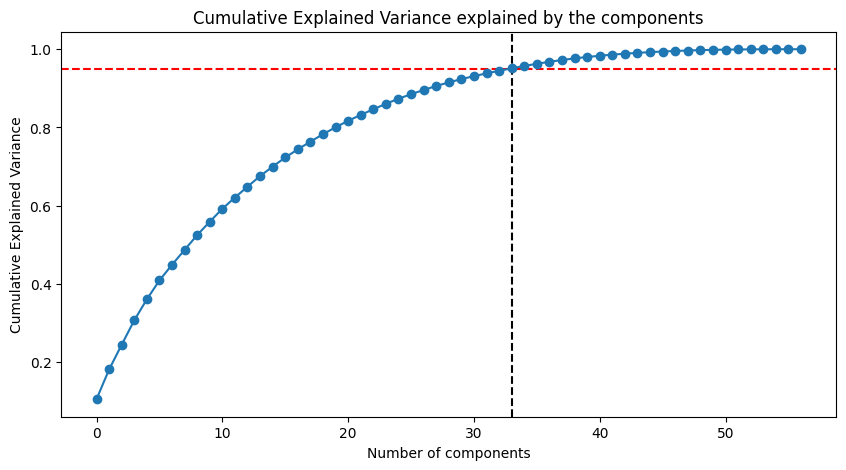

In [90]:
plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by the components')
plt.ylabel('Cumulative Explained Variance')
plt.xlabel('Number of components')
plt.axvline(x=components_number, color="k", linestyle="--")
plt.axhline(y=threshold, color="r", linestyle="--")
plt.plot(cumulative_var, marker='o')
plt.show()

In [92]:
df.columns[:34]

Index(['Age', 'Gender', 'Locality', 'Maritalstatus', 'LifeStyle', 'Sleep',
       'Category', 'Depression', 'Hyperlipi', 'Smoking', 'FHistory',
       'Diabetes', 'HTN', 'Allergies', 'BP', 'Thrombolysis', 'BGR', 'BUrea',
       'SCr', 'SSodium', 'SPotassium', 'SChloride', 'CPK', 'CKMB', 'ESR',
       'WBC', 'RBC', 'Hemoglobin', 'PCV', 'MCV', 'MCH', 'MCHC',
       'PLATELET_COUNT', 'NEUTROPHIL'],
      dtype='object')

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
y = df.pop('Mortality') #dependent variable
X = df[df.columns[:34]] # independent variables

In [96]:
# the basic way with validation set

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                   random_state=42,
                                                   stratify=y 
                                                   )

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, # we use train sets in here!
                                                  test_size=0.25,  # remember that X_train = 0.8 of X
                                                  random_state=42,
                                                  stratify=y_train
                                                 )

In [97]:
from sklearn.model_selection import KFold

In [98]:
# kfoldcv = KFold(n_splits=5, # number of folds, 5 is default
#                shuffle=True, # if true, the data is shuffled at the beggining
#                random_state=42 # ensures that when we use it again we will get same results
#                )

# # and the loop is the same for each cross-validation
# for train, test in kfoldcv.split(X, y):
#     X_train, y_train = X.iloc[train], y.iloc[train]
#     X_test, y_test = X.iloc[test], y.iloc[test]
#     print(X_train.shape, X_test.shape)

In [113]:
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.fit_transform(X_val)
X_test_scaled = scaler.fit_transform(X_test)

In [106]:
import xgboost as xgb

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


def calculate_metrics(target, prediction, average='macro'):
    accuracy = accuracy_score(target, prediction)
    precision = precision_score(target, prediction, average=average, zero_division = 0)
    recall = recall_score(target, prediction, average=average)
    f1 = f1_score(target, prediction, average=average)
    mislabeled = (target != prediction).sum()
    total = len(target)
    return accuracy, precision, recall, f1, mislabeled, total

def print_results(metrics, classifier_id='classifier'):
    print(f'Results for {classifier_id}')
    print('----')
    print(f'  Accuracy:  {metrics[0]}')
    print(f'  Precision: {metrics[1]}')
    print(f'  Recall:    {metrics[2]}')
    print(f'  F1 score:  {metrics[3]}')
    print(f'  Mislabeled {metrics[4]} out of {metrics[5]}')
    print('\n')

In [119]:
model = xgb.XGBClassifier()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
y_pred_train = model.predict(X_train_scaled)
print_results(calculate_metrics(y_test, y_pred))
y_pred_val = model.predict(X_val_scaled)

Results for classifier
----
  Accuracy:  0.9459459459459459
  Precision: 0.9202586206896552
  Recall:    0.9202586206896552
  F1 score:  0.9202586206896552
  Mislabeled 4 out of 74




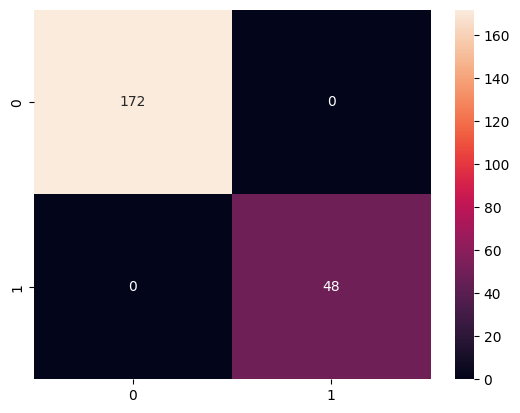

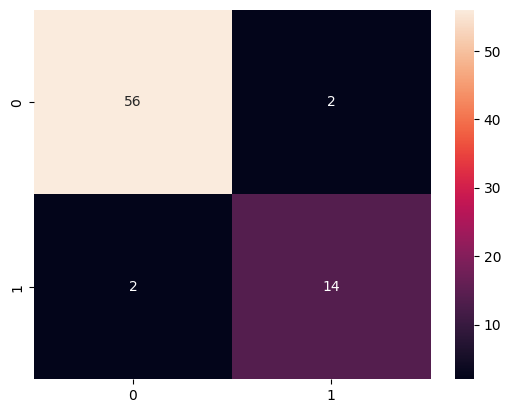

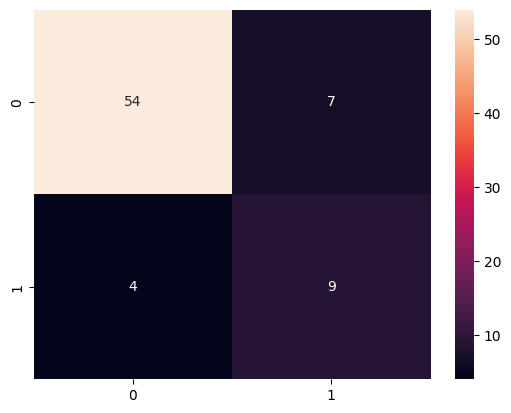

In [120]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm_train = confusion_matrix(y_train, y_pred_train)

cm_val = confusion_matrix(y_pred_val, y_val)

import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(cm_train, annot = True, fmt = 'd')
plt.show()

sns.heatmap(cm, annot = True, fmt = 'd')
plt.show()

sns.heatmap(cm_val, annot = True, fmt = 'd')
plt.show()

In [122]:
print_results(calculate_metrics(y_train, y_pred_train))

Results for classifier
----
  Accuracy:  1.0
  Precision: 1.0
  Recall:    1.0
  F1 score:  1.0
  Mislabeled 0 out of 220




In [ ]:
#przetrenuj model z wybranymi hiperparametrami
tree_model=tree.DecisionTreeRegressor(random_state=111,min_samples_split=50,max_depth=9)
tree_model.fit(X_train,y_train)
tree_pred=tree_model.predict(X_test)
mae(y_test,tree_pred)